# 영근팀원님 분석

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\User\LG_Aimers\MainTask\train.csv')

In [3]:
#쓸데없는 아이디
df = df.drop(columns = ['ID'],axis=1)

In [5]:
#결측치가 대부분인 피쳐 지우기 > (70%)
df = df.drop(columns = ['임신 시도 또는 마지막 임신 경과 연수',
                        '착상 전 유전 검사 사용 여부',
                        '난자 기증자 나이',
                        '정자 기증자 나이',
                        'PGD 시술 여부',
                        'PGS 시술 여부',
                        '난자 해동 경과일',
                        '배아 해동 경과일',
                       ],axis=1)

In [7]:
#중간 정도인 결측치 개수 (20%~70%) 및 value가 대부분 0이어서 분별력 없음
df = df.drop(columns = ['난자 혼합 경과일',
                        '난자 채취 경과일'
                       ],axis=1)

In [9]:
df.columns

Index(['시술 시기 코드', '시술 당시 나이', '시술 유형', '특정 시술 유형', '배란 자극 여부', '배란 유도 유형',
       '단일 배아 이식 여부', '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인',
       '여성 주 불임 원인', '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인',
       '불임 원인 - 난관 질환', '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인',
       '불임 원인 - 자궁경부 문제', '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도',
       '불임 원인 - 정자 면역학적 요인', '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '배아 생성 주요 이유',
       '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
       'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수',
       '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수',
       '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수',
       '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수',
       '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처', '동결 배아 사용 여부', '신선 배아 사용 여부',
       '기증 배아 사용 여부', '대리모 여부', '배아 이식 경과일', '임신 성공 여부'],
      dtype='object')

In [11]:
#배아 이식 경과일은 target correlation이 높음 -> 
#논문에서 상대적으로 정확성이 괜찮았던 K-NN Imputation으로 결측치 대체 

#0~7까지이며 7.0은 매우 소수이므로 neighbor=6으로 설정 
import pandas as pd
from sklearn.impute import KNNImputer

# K-NN Imputation 수행
df_numeric = df[['배아 이식 경과일']]
imputer = KNNImputer(n_neighbors=6)
df[['배아 이식 경과일']] = imputer.fit_transform(df_numeric)

In [13]:
#다른 column등을 고려한 3.254741이 결측치로 채워졌음을 알 수 있음
df['배아 이식 경과일'].value_counts(dropna=False)

배아 이식 경과일
5.000000    81459
3.000000    57924
3.254741    43566
2.000000    35078
0.000000    24904
1.000000     6053
4.000000     4504
6.000000     2773
7.000000       90
Name: count, dtype: int64

In [15]:
df.to_csv('preprocessed.csv',encoding='utf-8-sig')

In [17]:
age_map = {
    "만18-34세": 0,
    "만35-37세": 1,
    "만38-39세": 2,
    "만40-42세": 3,
    "만43-44세": 4,
    "만45-50세": 5
}

df['시술 당시 나이'] = df['시술 당시 나이'].map(age_map)

# 25.02.07 진행 

In [21]:
df['시술 당시 나이'].value_counts(dropna=False)

시술 당시 나이
0.0    102476
1.0     57780
2.0     39247
3.0     37348
4.0     12253
5.0      6918
NaN       329
Name: count, dtype: int64

In [24]:
#범주형 데이터는 최빈값(Mode)으로 채우는 것이 일반적 -> Nan 329개 최빈값으로 채우기
#결측치는 0.133%라 매우 미묘할 것으로 판단 
most_frequent = df['시술 당시 나이'].mode()[0]  # 최빈값 찾기
df['시술 당시 나이'].fillna(most_frequent, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13648\3138554599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['시술 당시 나이'].fillna(most_frequent, inplace=True)


In [26]:
df['시술 당시 나이'].value_counts(dropna=False)

시술 당시 나이
0.0    102805
1.0     57780
2.0     39247
3.0     37348
4.0     12253
5.0      6918
Name: count, dtype: int64

In [32]:
#GPT / Claude 동시추천
#시술 시기 코드는 target encoding으로 전처리
#각 시술 코드의 성공률을 기반으로 수치화
#성공률이라는 실제 의미 있는 정보를 활용할 수 있음
#과적합 방지를 위해 cross-validation 기반의 target encoding 권장
df['시술 시기 코드'].value_counts(dropna=False)

시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
te = TargetEncoder()
df['시술 시기 코드'] = te.fit_transform(df['시술 시기 코드'], df['임신 성공 여부'])

In [40]:
#0.269087 (26.9%) → TRYBLT의 성공률
#0.266271 (26.6%) → TRJXFG의 성공률
#0.259779 (25.9%) → TRVNRY의 성공률
#0.255120 (25.5%) → TRZKPL의 성공률
df['시술 시기 코드']

0         0.255120
1         0.269087
2         0.259779
3         0.266271
4         0.259779
            ...   
256346    0.269087
256347    0.269087
256348    0.259779
256349    0.255120
256350    0.256122
Name: 시술 시기 코드, Length: 256351, dtype: float64

In [46]:
#배란 유도 유형 -> 기록되지 않음, 알 수 없음이 대부분이므로 필요 없다 판단
df = df.drop(columns = ['배란 유도 유형'],axis=1)

In [48]:
#한글빼기 
def removeHangual(tmp):
    return int(tmp[0])
df.loc[:,['총 시술 횟수']] = df['총 시술 횟수'].apply(removeHangual)
df.loc[:,['클리닉 내 총 시술 횟수']] = df['클리닉 내 총 시술 횟수'].apply(removeHangual)
df.loc[:,['IVF 시술 횟수']] = df['IVF 시술 횟수'].apply(removeHangual)
df.loc[:,['DI 시술 횟수']] = df['DI 시술 횟수'].apply(removeHangual)
df.loc[:,['총 임신 횟수']] = df['총 임신 횟수'].apply(removeHangual)
df.loc[:,['IVF 임신 횟수']] = df['IVF 임신 횟수'].apply(removeHangual)
df.loc[:,['DI 임신 횟수']] = df['DI 임신 횟수'].apply(removeHangual)
df.loc[:,['총 출산 횟수']] = df['총 출산 횟수'].apply(removeHangual)
df.loc[:,['IVF 출산 횟수']] = df['IVF 출산 횟수'].apply(removeHangual)
df.loc[:,['DI 출산 횟수']] = df['DI 출산 횟수'].apply(removeHangual)

In [54]:
#출처는 value variance가 적어 label encoding으로 처리해도 된다고 판단
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.loc[:,'난자 출처'] = encoder.fit_transform(df['난자 출처'])
df.loc[:,'정자 출처'] = encoder.fit_transform(df['정자 출처'])

In [62]:
df['특정 시술 유형'].value_counts()

특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                         1248
IVF:IVF                                  1146
ICSI:IVF                                  873
ICSI / AH                                 769
IVF:ICSI                                  392
IVF / AH                                  319
ICSI:Unknown                              207
IVF:Unknown                               100
ICI                                        96
Generic DI                                 71
IVI                                        23
ICSI / BLASTOCYST:IVF / BLASTOCYST          6
ICSI / BLASTOCYST :IVF / BLASTOCYST         4
FER                                         3
IVF / AH:ICSI / AH                          2
GIFT                     

In [76]:
import pandas as pd
import numpy as np

def preprocess_treatment_type(df, treatment_column):
    df = df.copy()
    
    df[treatment_column] = df[treatment_column].fillna('Unknown')
    # 기본 시술 타입 추출 (ICSI, IVF, IUI 등)
    df['base_treatment'] = df[treatment_column].apply(lambda x: x.split(':')[0].split('/')[0].strip())
    
    # Blastocyst 사용 여부
    df['has_blastocyst'] = df[treatment_column].str.contains('BLASTOCYST', case=False).astype(int)
    
    # AH(Assisted Hatching) 사용 여부
    df['has_ah'] = df[treatment_column].str.contains('AH', case=False).astype(int)
    
    # 콤비네이션 시술 여부
    df['is_combination'] = df[treatment_column].str.contains(':').astype(int)
    
    # 시술 빈도가 매우 낮은 케이스 처리 (100건 미만)
    treatment_counts = df['base_treatment'].value_counts()
    rare_treatments = treatment_counts[treatment_counts < 100].index
    df['is_rare_treatment'] = df['base_treatment'].isin(rare_treatments).astype(int)
    df['base_treatment'] = df['base_treatment'].apply(
        lambda x: 'Other' if x in rare_treatments else x
    )
    
    # 주요 시술 타입에 대한 One-hot encoding
    major_treatments = ['ICSI', 'IVF', 'IUI']
    for treatment in major_treatments:
        df[f'is_{treatment.lower()}'] = (df['base_treatment'] == treatment).astype(int)
    
    # Unknown 처리
    df['is_unknown'] = (df['base_treatment'] == 'Unknown').astype(int)
    
    return df


In [82]:
df = preprocess_treatment_type(df,'특정 시술 유형')

In [88]:
df = df.drop(columns = ['특정 시술 유형','base_treatment'],axis=1)

In [92]:
df = df.drop(columns = ['시술 유형'],axis=1)

In [94]:
df

,시술 시기 코드,시술 당시 나이,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,...,배아 이식 경과일,임신 성공 여부,has_blastocyst,has_ah,is_combination,is_rare_treatment,is_icsi,is_ivf,is_iui,is_unknown
0,0.255120,0.0,1,0.0,0.0,0,0,0,0,0,...,3.000000,0,0,0,0,0,1,0,0,0
1,0.269087,5.0,0,0.0,0.0,0,0,0,0,0,...,3.254741,0,0,0,0,0,1,0,0,0
2,0.259779,0.0,1,0.0,0.0,0,0,0,0,0,...,2.000000,0,0,0,0,0,0,1,0,0
3,0.266271,1.0,1,0.0,0.0,0,0,0,0,0,...,3.254741,0,0,0,0,0,1,0,0,0
4,0.259779,0.0,1,0.0,0.0,0,0,0,0,0,...,3.000000,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256346,0.269087,0.0,1,0.0,0.0,0,0,0,0,0,...,5.000000,0,0,0,0,0,1,0,0,0
256347,0.269087,2.0,1,0.0,0.0,0,0,0,0,0,...,3.000000,1,0,0,0,0,1,0,0,0
256348,0.259779,1.0,1,0.0,0.0,0,0,0,0,0,...,3.000000,0,0,0,0,0,1,0,0,0
256349,0.255120,2.0,1,0.0,0.0,0,0,0,0,0,...,1.000000,1,0,0,0,0,1,0,0,0


In [100]:
#현재 시술용의 분포가 압도적으로 많아 모델에 악영향이 있을꺼라 판단
df['배아 생성 주요 이유'].value_counts(dropna=False)
df = df.drop(columns = ['배아 생성 주요 이유'],axis=1)

In [102]:
df.to_csv('preprocessed_tmp.csv',encoding = 'utf-8-sig')

In [104]:
#결측치가 있는 feature 
missing_columns = df.columns[df.isnull().any()]
print(missing_columns)

Index(['단일 배아 이식 여부', '착상 전 유전 진단 사용 여부', '총 생성 배아 수', '미세주입된 난자 수',
       '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수',
       '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수',
       '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '동결 배아 사용 여부',
       '신선 배아 사용 여부', '기증 배아 사용 여부', '대리모 여부'],
      dtype='object')


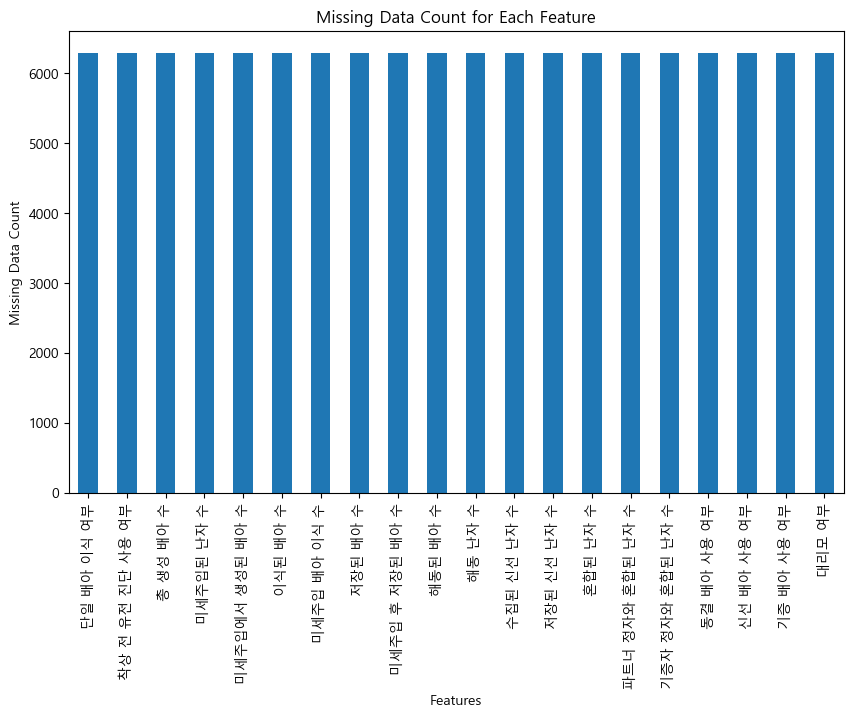

In [114]:
import matplotlib.pyplot as plt

missing_data = df[['단일 배아 이식 여부', '착상 전 유전 진단 사용 여부', '총 생성 배아 수', '미세주입된 난자 수',
                   '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수',
                   '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', 
                   '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', 
                   '기증자 정자와 혼합된 난자 수', '동결 배아 사용 여부', '신선 배아 사용 여부', 
                   '기증 배아 사용 여부', '대리모 여부']].isnull().sum()

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar')
plt.title('Missing Data Count for Each Feature')
plt.xlabel('Features')
plt.ylabel('Missing Data Count')
plt.xticks(rotation=90)
plt.show()